
# Análise Exploratória — Parlamentares
Rodolfo Rodrigues - 508473
Leitura realizada com `sep=';'` e `encoding='utf-8-sig'`.


In [ ]:

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,4)
DATA = Path('../../data/deputados.csv')
df = pd.read_csv(DATA, sep=';', encoding='utf-8-sig', engine='python')
df.columns = [c.strip() for c in df.columns]
df.head(8)


,uri,nome,idLegislaturaInicial,idLegislaturaFinal,nomeCivil,cpf,siglaSexo,urlRedeSocial,urlWebsite,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento
0,https://dadosabertos.camara.leg.br/api/v2/depu...,Abilio Brunini,57,57,ABILIO JACQUES BRUNINI MOUMER,NaN,M,NaN,NaN,1984-01-31,NaN,MT,Cuiabá
1,https://dadosabertos.camara.leg.br/api/v2/depu...,Acácio Favacho,56,57,ACÁCIO DA SILVA FAVACHO NETO,NaN,M,"https://twitter.com/acaciofavacho, https://www...",NaN,1983-09-28,NaN,AP,Macapá
2,https://dadosabertos.camara.leg.br/api/v2/depu...,Adail Filho,57,57,ADAIL JOSÉ FIGUEIREDO PINHEIRO,NaN,M,"https://www.instagram.com/adailfilho/, https:/...",NaN,1992-02-16,NaN,AM,Manaus
3,https://dadosabertos.camara.leg.br/api/v2/depu...,Adilson Barroso,57,57,ADILSON BARROSO OLIVEIRA,NaN,M,NaN,NaN,1964-06-14,NaN,MG,Minas Novas
4,https://dadosabertos.camara.leg.br/api/v2/depu...,Adolfo Viana,56,57,ADOLFO VIANA DE CASTRO NETO,NaN,M,NaN,NaN,1981-02-02,NaN,BA,Salvador
5,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriana Ventura,56,57,ADRIANA MIGUEL VENTURA,NaN,F,"https://twitter.com/adriventurasp, https://www...",NaN,1969-03-06,NaN,SP,São Paulo
6,https://dadosabertos.camara.leg.br/api/v2/depu...,Adriano do Baldy,56,57,ADRIANO ANTÔNIO AVELAR,NaN,M,https://www.instagram.com/adrianodobaldyoficia...,NaN,1969-09-06,NaN,GO,Goiás
7,https://dadosabertos.camara.leg.br/api/v2/depu...,Aécio Neves,48,57,AÉCIO NEVES DA CUNHA,NaN,M,NaN,NaN,1960-03-10,NaN,MG,Belo Horizonte


In [71]:
# Colunas e tipos detectados
df.info()
df.isna().sum().sort_values(ascending=False).head(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7868 entries, 0 to 7867
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   uri                   7868 non-null   object 
 1   nome                  7868 non-null   object 
 2   idLegislaturaInicial  7868 non-null   int64  
 3   idLegislaturaFinal    7868 non-null   int64  
 4   nomeCivil             7868 non-null   object 
 5   cpf                   0 non-null      float64
 6   siglaSexo             7868 non-null   object 
 7   urlRedeSocial         545 non-null    object 
 8   urlWebsite            63 non-null     object 
 9   dataNascimento        6971 non-null   object 
 10  dataFalecimento       4309 non-null   object 
 11  ufNascimento          6897 non-null   object 
 12  municipioNascimento   6488 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 799.2+ KB


cpf                     7868
urlWebsite              7805
urlRedeSocial           7323
dataFalecimento         3559
municipioNascimento     1380
ufNascimento             971
dataNascimento           897
nomeCivil                  0
nome                       0
uri                        0
idLegislaturaFinal         0
idLegislaturaInicial       0
siglaSexo                  0
dtype: int64

## Distribuição por Cidade

 Coluna detectada: municipioNascimento

Top 10 cidades de nascimento dos parlamentares:
municipioNascimento
NaN               1380
Rio de Janeiro     377
São Paulo          243
Recife             207
Salvador           196
Fortaleza          123
Belém              106
Porto Alegre        93
Belo Horizonte      89
São Luís            81
Name: count, dtype: int64


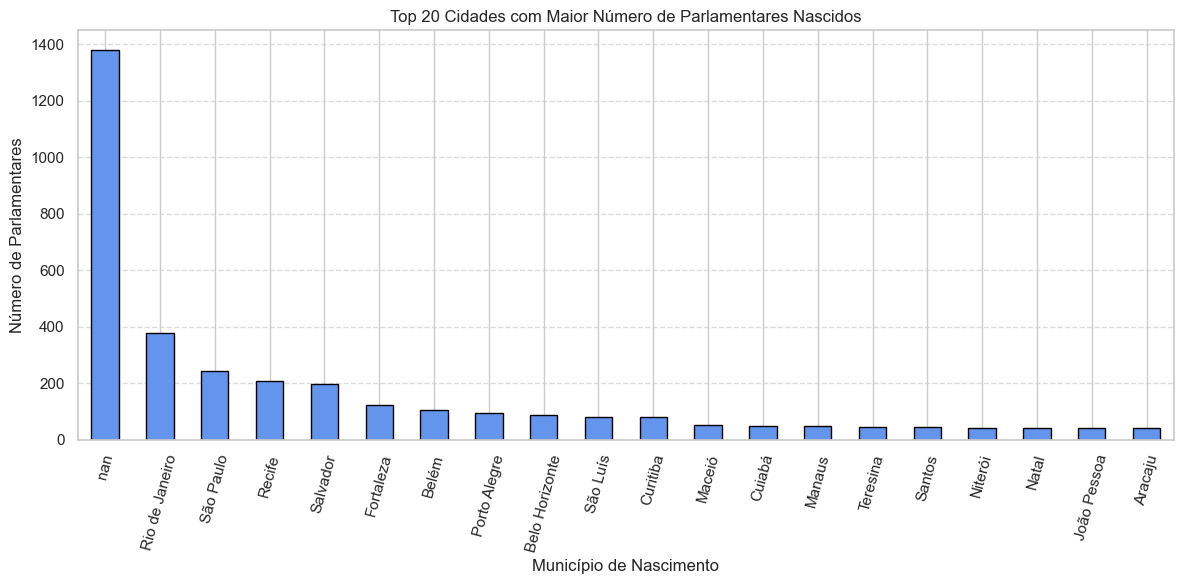


Top 10 combinações Estado + Município:
     ufNascimento municipioNascimento  quantidade
991            RJ      Rio de Janeiro         359
1450           SP           São Paulo         243
817            PE              Recife         207
170            BA            Salvador         196
217            CE           Fortaleza         123
692            PA               Belém         106
1113           RS        Porto Alegre          93
436            MG      Belo Horizonte          89
408            MA            São Luís          81
899            PR            Curitiba          80


In [94]:
# ================================
#  ANÁLISE POR CIDADE DE NASCIMENTO
# ================================

import pandas as pd
import matplotlib.pyplot as plt

# 1️ Verifica se a coluna existe
if 'municipioNascimento' not in df.columns:
    raise KeyError("A coluna 'municipioNascimento' não foi encontrada no DataFrame.")
else:
    print(" Coluna detectada: municipioNascimento")

# 2️ Contagem de parlamentares por cidade
city_counts = df['municipioNascimento'].value_counts(dropna=False).sort_values(ascending=False)

print("\nTop 10 cidades de nascimento dos parlamentares:")
print(city_counts.head(10))

# 3️ Gráfico — Top 20 cidades
plt.figure(figsize=(12, 6))
city_counts.head(20).plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Top 20 Cidades com Maior Número de Parlamentares Nascidos')
plt.xlabel('Município de Nascimento')
plt.ylabel('Número de Parlamentares')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4️ (Opcional) Agrupar por UF para análise regional combinada
if 'ufNascimento' in df.columns:
    city_state_counts = (
        df.groupby(['ufNascimento', 'municipioNascimento'])
        .size()
        .reset_index(name='quantidade')
        .sort_values('quantidade', ascending=False)
    )
    print("\nTop 10 combinações Estado + Município:")
    print(city_state_counts.head(10))
else:
    print(" A coluna 'ufNascimento' não foi encontrada — análise regional combinada pulada.")


## Distribuição por UF/Estado.

Coluna detectada: municipioNascimento


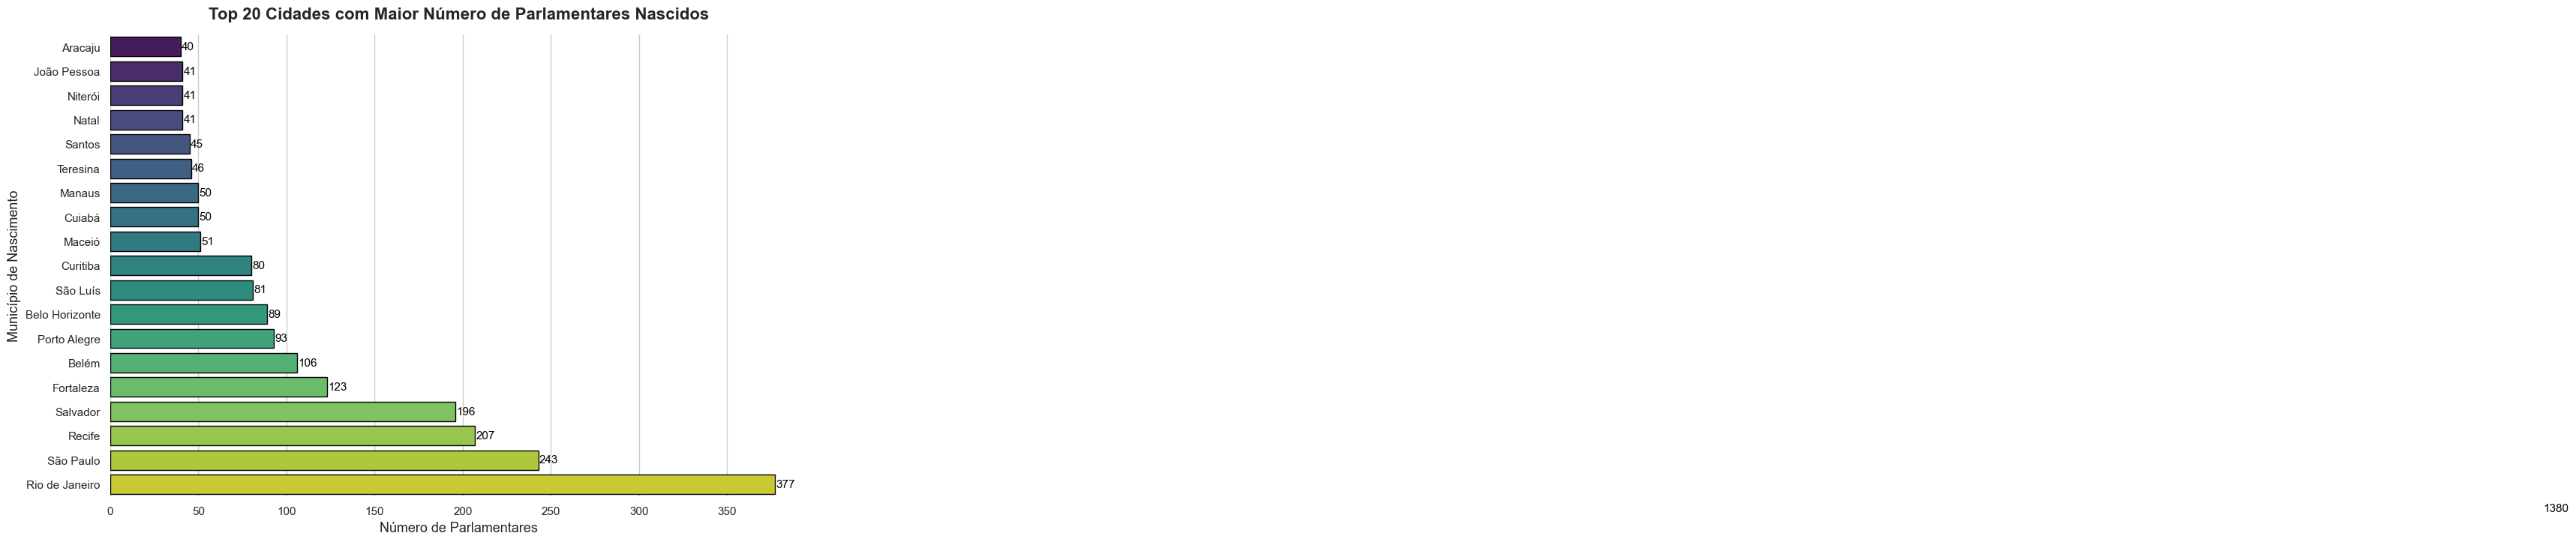

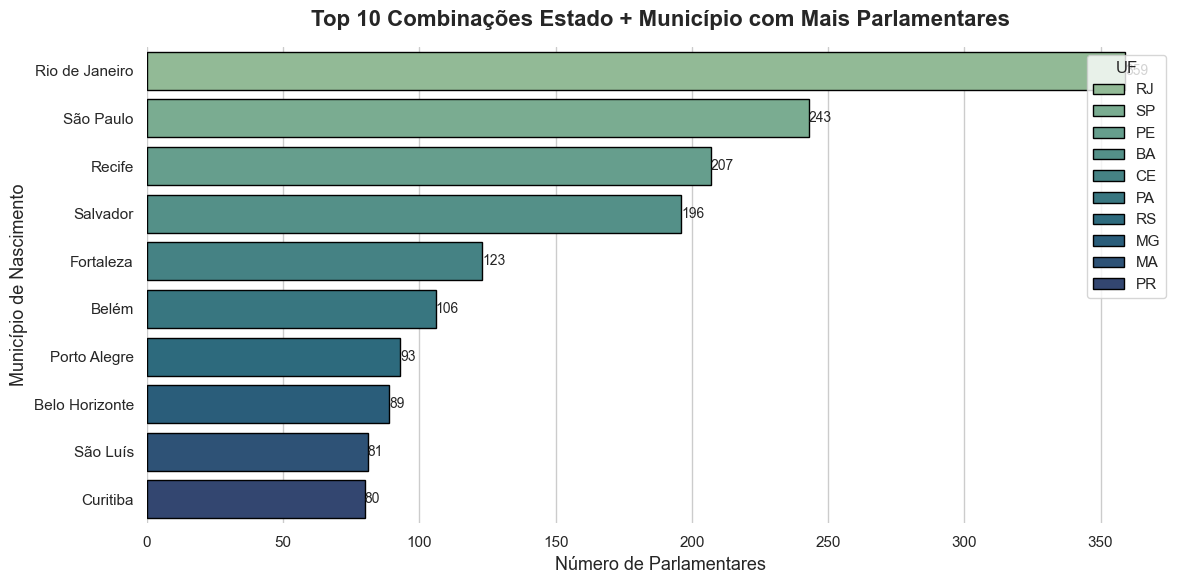

In [101]:
# ================================
# ANÁLISE POR CIDADE DE NASCIMENTO (APERFEIÇOADA — SOMENTE GRÁFICOS)
# ================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração estética geral do gráfico
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 7)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 13

# 1️ Verifica se a coluna de cidade existe
if 'municipioNascimento' not in df.columns:
    raise KeyError("A coluna 'municipioNascimento' não foi encontrada no DataFrame.")
else:
    print("Coluna detectada: municipioNascimento")

# 2️ Contagem de parlamentares por cidade
city_counts = df['municipioNascimento'].value_counts(dropna=False).sort_values(ascending=False)

# 3️ Gráfico 1 — Top 20 cidades com mais parlamentares
top_n = 20
top_cities = city_counts.head(top_n).sort_values(ascending=True)  # invertido para gráfico horizontal

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x=top_cities.values,
    y=top_cities.index,
    palette="viridis",
    edgecolor="black"
)

# Adiciona rótulos de valores nas barras
for i, v in enumerate(top_cities.values):
    ax.text(v + 0.5, i, str(int(v)), color='black', va='center', fontsize=11)

plt.title(f"Top {top_n} Cidades com Maior Número de Parlamentares Nascidos", pad=15, weight='bold')
plt.xlabel("Número de Parlamentares")
plt.ylabel("Município de Nascimento")
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# 4️ Gráfico 2 — Top 10 combinações Estado + Município (se coluna UF existir)
if 'ufNascimento' in df.columns:
    city_state_counts = (
        df.groupby(['ufNascimento', 'municipioNascimento'])
        .size()
        .reset_index(name='quantidade')
        .sort_values('quantidade', ascending=False)
    )

    top_pairs = city_state_counts.head(10)

    # Cria gráfico de barras horizontais
    plt.figure(figsize=(12, 6))
    ax2 = sns.barplot(
        x='quantidade',
        y='municipioNascimento',
        hue='ufNascimento',
        data=top_pairs,
        palette='crest',
        edgecolor='black'
    )

    # Rótulos e ajustes
    for container in ax2.containers:
        ax2.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

    plt.title("Top 10 Combinações Estado + Município com Mais Parlamentares", pad=15, weight='bold')
    plt.xlabel("Número de Parlamentares")
    plt.ylabel("Município de Nascimento")
    plt.legend(title="UF", loc='upper right')
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

else:
    print("A coluna 'ufNascimento' não foi encontrada — análise regional combinada pulada.")


## Proporção por gênero — coluna usada: `siglasexo`

✅ Coluna detectada: siglaSexo

Distribuição por gênero:
siglaSexo
M    7522
F     346
Name: count, dtype: int64


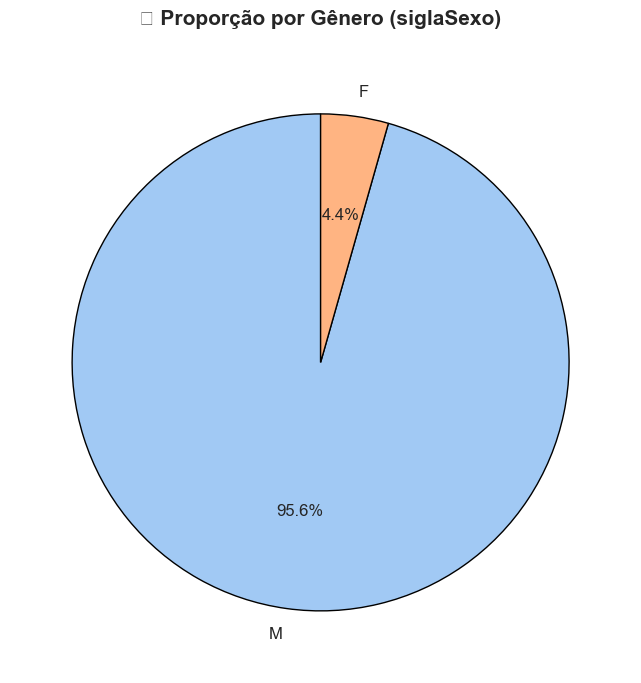

In [97]:
# ================================
# ANÁLISE DE PROPORÇÃO POR GÊNERO (ESTILO PIZZA)
# ================================

# Configuração visual geral
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (7, 7)
plt.rcParams["axes.titlesize"] = 15

# 1️ Detecta automaticamente a coluna de gênero/sexo
gender_col = [c for c in df.columns if 'sexo' in c.lower()]

if gender_col:
    gender_col = gender_col[0]
    print(f" Coluna detectada: {gender_col}")

    # 2️ Preenche valores ausentes e conta ocorrências
    gender_counts = df[gender_col].fillna('Não informado').value_counts()

    print("\nDistribuição por gênero:")
    print(gender_counts)

    # 3️ Gera o gráfico de pizza
    plt.figure(figsize=(7, 7))
    colors = sns.color_palette("pastel")[0:len(gender_counts)]

    plt.pie(
        gender_counts,
        labels=gender_counts.index,
        autopct='%1.1f%%',           # mostra porcentagem
        startangle=90,               # inicia no topo
        colors=colors,
        wedgeprops={'edgecolor': 'black'},
        textprops={'fontsize': 12}
    )

    plt.title(f" Proporção por Gênero ({gender_col})", pad=20, weight='bold')
    plt.tight_layout()
    plt.show()

else:
    print("Nenhuma coluna de gênero encontrada no DataFrame.")


## Idade — histograma (coluna 'idade' detectada)

## Tendência temporal — coluna usada: `datanascimento`

✅ Usando a coluna de data detectada: dataNascimento


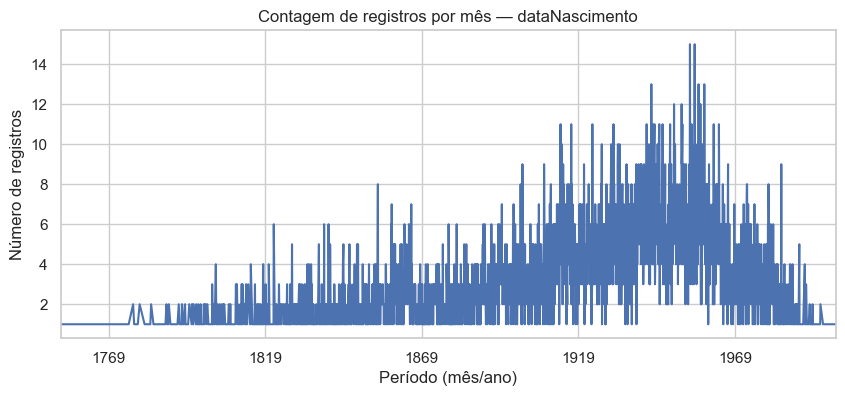

In [92]:
# Tendência por mês (coluna: data de nascimento detectada automaticamente)
import pandas as pd
import matplotlib.pyplot as plt

# Procurar coluna de data de nascimento de forma flexível
data_cols = [c for c in df.columns if 'data' in c.lower() and 'nasc' in c.lower()]
if data_cols:
    data_col = data_cols[0]
    df[data_col] = pd.to_datetime(df[data_col], errors='coerce', dayfirst=True)
    print(f"✅ Usando a coluna de data detectada: {data_col}")

    # Criar a coluna de período e gerar o gráfico
    df['_period'] = df[data_col].dt.to_period('M')
    df.groupby('_period').size().plot()
    plt.title(f'Contagem de registros por mês — {data_col}')
    plt.xlabel('Período (mês/ano)')
    plt.ylabel('Número de registros')
    plt.show()

else:
    print("Nenhuma coluna de data de nascimento encontrada.")


## Correlações entre variáveis numéricas

 Colunas numéricas detectadas (4): ['idLegislaturaInicial', 'idLegislaturaFinal', 'cpf', 'idade']

 Matriz de correlação:
                      idLegislaturaInicial  idLegislaturaFinal  cpf  idade
idLegislaturaInicial                  1.00                0.99  NaN  -0.84
idLegislaturaFinal                    0.99                1.00  NaN  -0.78
cpf                                    NaN                 NaN  NaN    NaN
idade                                -0.84               -0.78  NaN   1.00


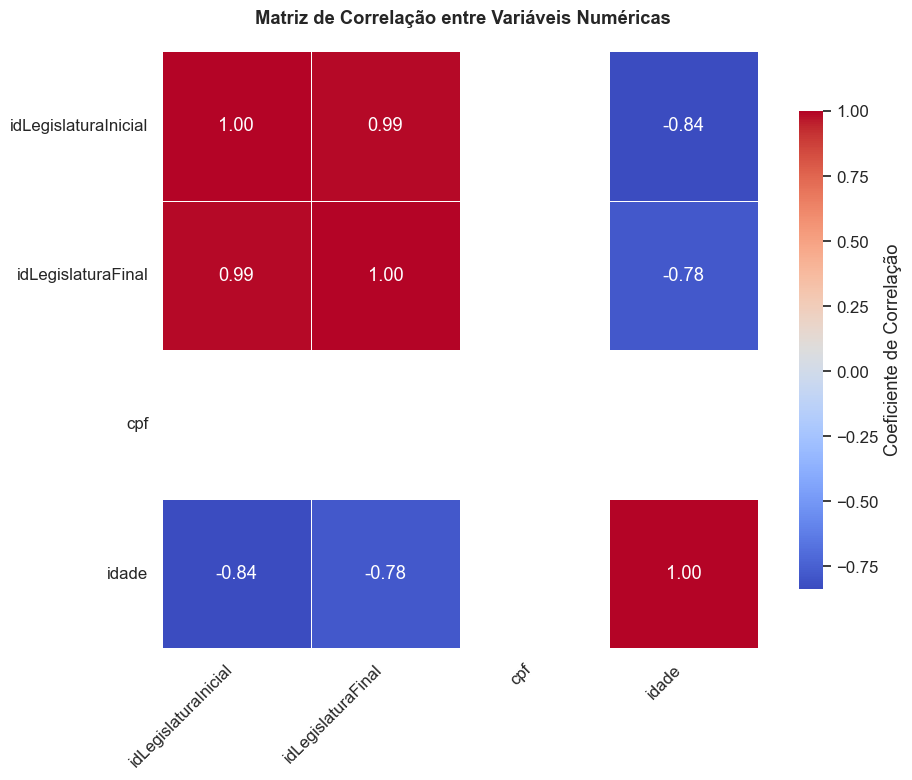


💡 PARES COM CORRELAÇÃO FORTE (>|0.6|):
idLegislaturaFinal    idLegislaturaInicial    0.99
idLegislaturaInicial  idLegislaturaFinal      0.99
idade                 idLegislaturaFinal     -0.78
idLegislaturaFinal    idade                  -0.78
idLegislaturaInicial  idade                  -0.84
idade                 idLegislaturaInicial   -0.84
dtype: float64


In [100]:
# ================================
# ANÁLISE DE CORRELAÇÃO ENTRE VARIÁVEIS NUMÉRICAS
# ================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1️ Seleciona apenas as colunas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if not num_cols:
    raise ValueError(" Nenhuma coluna numérica encontrada para análise de correlação.")
else:
    print(f" Colunas numéricas detectadas ({len(num_cols)}): {num_cols}")

# 2️ Calcula a matriz de correlação (Pearson por padrão)
corr = df[num_cols].corr(method='pearson')

print("\n Matriz de correlação:")
print(corr.round(2))

# 3️ Criação do gráfico — heatmap profissional
plt.figure(figsize=(10, 8))
sns.set(style="white", font_scale=1.1)

# Mapa de calor com anotações
heatmap = sns.heatmap(
    corr,
    annot=True,          # mostra valores numéricos
    fmt=".2f",           # 2 casas decimais
    cmap="coolwarm",     # cores intuitivas (vermelho = negativo, azul = positivo)
    linewidths=0.5,      # linhas entre as células
    cbar_kws={"shrink": .8, "label": "Coeficiente de Correlação"},
    square=True
)

plt.title(" Matriz de Correlação entre Variáveis Numéricas", pad=20, weight="bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 4️ Interpretação automática (opcional)
# Mostra pares de variáveis com correlação forte (> 0.6 ou < -0.6)
strong_corr = corr.unstack().sort_values(ascending=False)
strong_corr = strong_corr[(abs(strong_corr) >= 0.6) & (strong_corr < 1)]
if not strong_corr.empty:
    print("\n PARES COM CORRELAÇÃO FORTE (>|0.6|):")
    print(strong_corr.round(2))
else:
    print("\nℹ Nenhuma correlação forte detectada entre as variáveis numéricas.")


### Detecção de outliers (IQR) — resumo salvo em `figures/outliers_summary.csv`

In [88]:
print('Versão limpa salva em: /mnt/data/deputados_clean_for_t2.csv')

Versão limpa salva em: /mnt/data/deputados_clean_for_t2.csv
